# CNN - Cats and Dogs!

Rob Rappa
09/04/2018

General Reference: https://becominghuman.ai/building-an-image-classifier-using-deep-learning-in-python-totally-from-a-beginners-perspective-be8dbaf22dd8

In [223]:
#########################
# IMPORT
#########################

import math
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization


In [44]:
#########################
# READ THE DATA
# REFERENCE: https://keras.io/preprocessing/image/
#########################

#Set Params
train_numImages = 10000
test_numImages = 2500
image_height = 64
image_width = 64
batch_size = 32

#Training Set
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)

training_set = train_datagen.flow_from_directory('/Users/robertjrappa/Documents/Life/Education/Self-Learning/ML_Projects/kagglecatsanddogs_3367a/PetImages_Train',
target_size = (image_height, image_width),
batch_size = batch_size,
class_mode = 'binary')

#Test Set
test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = test_datagen.flow_from_directory('/Users/robertjrappa/Documents/Life/Education/Self-Learning/ML_Projects/kagglecatsanddogs_3367a/PetImages_Test',
target_size = (image_height, image_width),
batch_size = batch_size,
class_mode = 'binary')

training_set

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


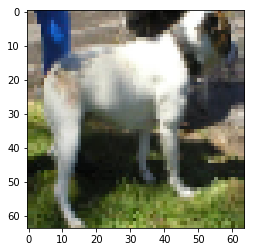

In [77]:
#########################
# VIEW THE DATA
#########################

x,y = training_set.next()

for i in range(0,1):
    image = x[i]
    
    #image.shape
    
    plt.imshow(image)
    plt.show()

In [226]:
#########################
# CONSTRUCT THE MODEL
#########################

#Number of items in output
# O = ((I − K + 2P)/S) + 1
#   where
#   I = size of the input
#   K = size of the kernel
#   P = size of the zero padding S = strides

#Notes
#32 filters for Step 1 and Step 3 works better than 64 a piece
#Adding batch noramlization results in better accuracy (when using 32 filters)

#Initialize the model
model = Sequential()

#Step 1: Add convolutional layer
model.add(Conv2D(32, 
                kernel_size=3, 
                activation='relu',
                input_shape=(image_height, image_width, 3)))

#Step 2: Batch Normalization
model.add(BatchNormalization())

#Step 3: Add convolutional layer
model.add(Conv2D(32, 
                kernel_size=3, 
                activation='relu',))

#Step 4: Batch Normalization
model.add(BatchNormalization())

#Step 5: Add convolutional layer
model.add(Conv2D(32, 
                kernel_size=3, 
                activation='relu',))

#Step 6: Batch Normalization
model.add(BatchNormalization())

#Step 7: Add convolutional layer
model.add(Conv2D(32, 
                kernel_size=3, 
                activation='relu',))

#Step 7: Batch Normalization
model.add(BatchNormalization())

#Step 5: Max Pooling layer
model.add(MaxPooling2D(pool_size = (2, 2)))

#Step 8: Add flatten layer
model.add(Flatten())

#Step 9: Add dense layer
model.add(Dense(units = 256, activation='relu'))

#Step 10: Add output layer
model.add(Dense(units = 1, activation='sigmoid'))

# Compiling the CNN
model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

In [227]:
#########################
# FIT THE MODEL
#########################

#steps_per_epoch: Total number of steps (batches of samples) to yield from generator before declaring 
#                 one epoch finished and starting the next epoch. It should typically be equal to the 
#                 number of unique samples of your dataset divided by the batch size.

model.fit_generator(training_set,
                    steps_per_epoch = math.ceil(train_numImages / batch_size ),
                    epochs = 10,
                    validation_data = test_set,
                    validation_steps = math.ceil(test_numImages / batch_size ))

Epoch 1/10
 13/313 [>.............................] - ETA: 3:43 - loss: 3.1099 - acc: 0.5938

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404094976 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404619264 bytes but only got 0. Skipping tag 5
  " Skippin

204/313 [==================>...........] - ETA: 1:06 - loss: 2.1174 - acc: 0.6098

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6553600 bytes but only got 0. Skipping tag 49
  " Skipping tag %s" % (size, len(data), tag))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 4951. Skipping tag 51
  " Skipping tag %s" % (size, len(data), tag))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293339136 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293863424 bytes but only got 0. Skipping tag 5
  " Sk

214/313 [===================>..........] - ETA: 1:00 - loss: 2.0744 - acc: 0.6100

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 209715200 bytes but only got 0. Skipping tag 48
  " Skipping tag %s" % (size, len(data), tag))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 52428800 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6468665344 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 7027. Skipping tag 48
  " 

234/313 [=====================>........] - ETA: 48s - loss: 1.9598 - acc: 0.6103

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 307363840 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 307888128 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 328728576 bytes but only got 0. Skipping tag 4
  " Skipping tag %s" % (size, len(data), tag))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1385474 bytes but only got 5357. Skipping tag 513
  " 

313/313 [==============================] - 244s 779ms/step - loss: 1.6338 - acc: 0.6182 - val_loss: 0.6096 - val_acc: 0.6800
Epoch 2/10
 10/313 [..............................] - ETA: 3:31 - loss: 0.5833 - acc: 0.6562

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, 

116/313 [==========>...................] - ETA: 2:02 - loss: 0.5904 - acc: 0.6856

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 262146 bytes but only got 0. Skipping tag 2
  " Skipping tag %s" % (size, len(data), tag))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 262151 bytes but only got 0. Skipping tag 56
  " Skipping tag %s" % (size, len(data), tag))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:764: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 0. 
  warnings.warn(str(msg))


278/313 [=========================>....] - ETA: 22s - loss: 0.5660 - acc: 0.7074

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 18350080 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:764: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 6. 
  warnings.warn(str(msg))


313/313 [==============================] - 258s 824ms/step - loss: 0.5599 - acc: 0.7122 - val_loss: 0.6475 - val_acc: 0.7068
Epoch 3/10
313/313 [==============================] - 238s 762ms/step - loss: 0.4964 - acc: 0.7603 - val_loss: 0.5121 - val_acc: 0.7540
Epoch 4/10
313/313 [==============================] - 239s 762ms/step - loss: 0.4790 - acc: 0.7647 - val_loss: 0.4564 - val_acc: 0.7888
Epoch 5/10
313/313 [==============================] - 242s 774ms/step - loss: 0.4451 - acc: 0.7891 - val_loss: 0.5031 - val_acc: 0.7738
Epoch 6/10
313/313 [==============================] - 244s 781ms/step - loss: 0.4430 - acc: 0.7924 - val_loss: 0.5288 - val_acc: 0.7780
Epoch 7/10
313/313 [==============================] - 242s 773ms/step - loss: 0.4037 - acc: 0.8146 - val_loss: 0.4658 - val_acc: 0.7944
Epoch 8/10
313/313 [==============================] - 241s 769ms/step - loss: 0.4182 - acc: 0.8088 - val_loss: 0.4701 - val_acc: 0.7810
Epoch 9/10
313/313 [==============================] - 242s 

In [228]:
#########################
# VISUALIZE PARTS OF THE NET
# Build a convolution function
#########################

#Build the convolution function

def convolution (image, channel, kernel):
    
    #take one channel
    image = image[:,:,channel]
    #plt.imshow(image)

    #define the image size
    image_size = image.shape[0]
    #print ('image size is ' + str(image.shape[0]) + ' ' + str(image.shape[1]))
    
    #define the kernel size
    kernel_size = kernel.shape[0]
    
    #define the window size
    window_size = kernel_size+1
    
    #define the output
    conv = np.zeros((image_size, image_size))
    
    #create convolution
    for ii in range(image_height-1):
        for jj in range(image_width-1):
            window = image[ii:ii+kernel_size, jj:jj+kernel_size] 
            
            if window.shape[1] != 3 or window.shape[0] !=3 :
                break
            else:
                conv[ii, jj] = np.sum(window * kernel)
                #print ('dimension of window is ' + str(window.shape[0]) + ' ' + str(window.shape[1]))
    #return
    return conv

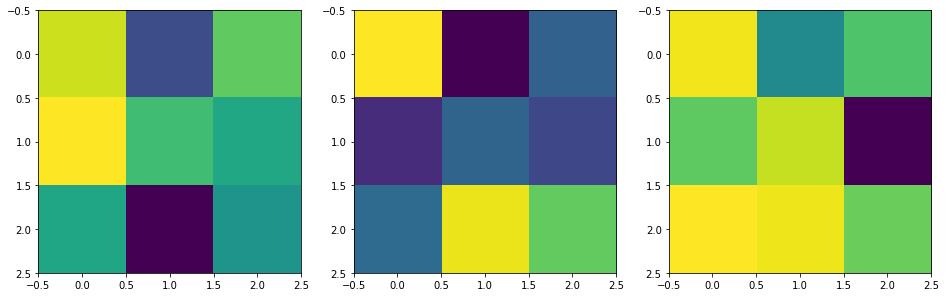

In [232]:
#########################
# VISUALIZE PARTS OF THE NET
# Visualize the kernels
#########################

#Get the kernel
conv1 = model.layers[0]
weights1 = conv1.get_weights() 
kernels1 = weights1[0] 
kernel_number_in_layer = 10
    
#Create figure
fig=plt.figure(figsize=(16, 16))
figure_numRows = 1
figure_numCols = 3

#Create filtered image (for all channels)
for i in range(0,3):

    #Set the channel as i
    channel = i 
    
    #Get the kernel for that channel
    #Dim 1 = Rows in Kernel
    #Dim 2 = Cols in Kernel
    #Dim 3 = Number of Channel
    #Dim 4 = Number of Channel
    kernel1_instance = kernels1[:, :, channel, kernel_number_in_layer] 

    #Add subplot for regular image
    fig.add_subplot(figure_numRows, figure_numCols, i+1)
    plt.imshow(kernel1_instance)

#Show an ex
plt.show()


Kernel 0


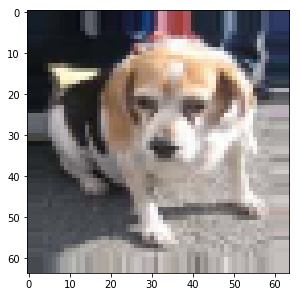

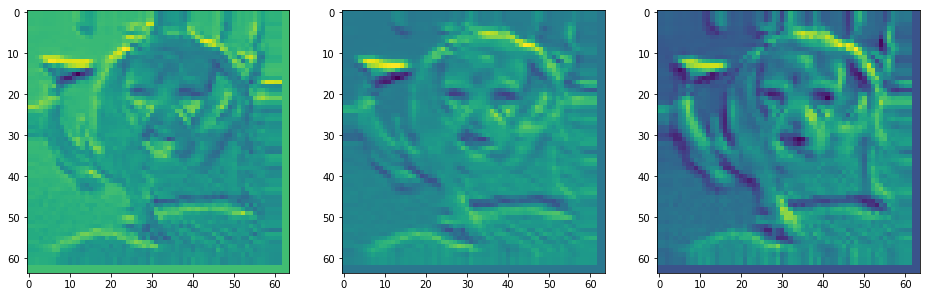

Kernel 1


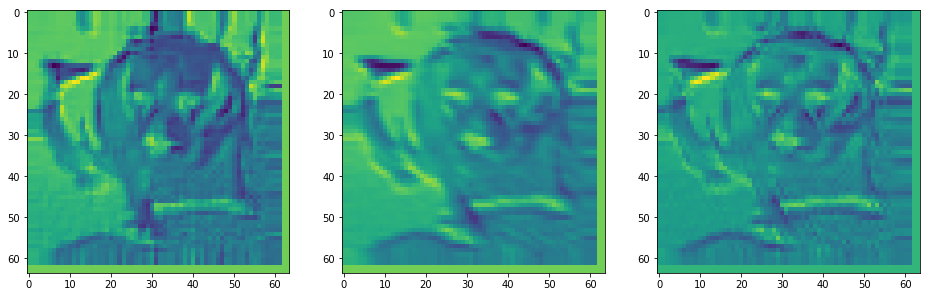

Kernel 2


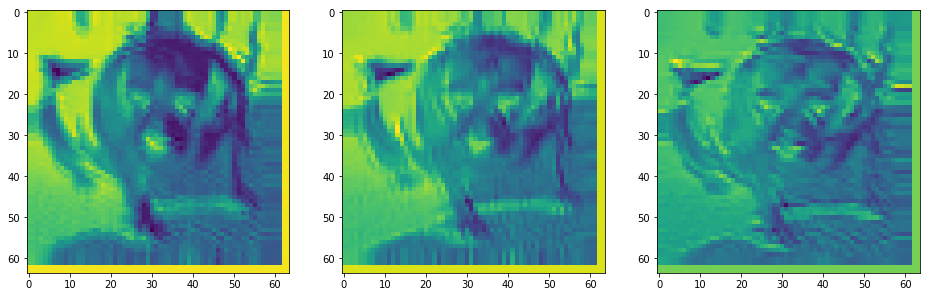

Kernel 3


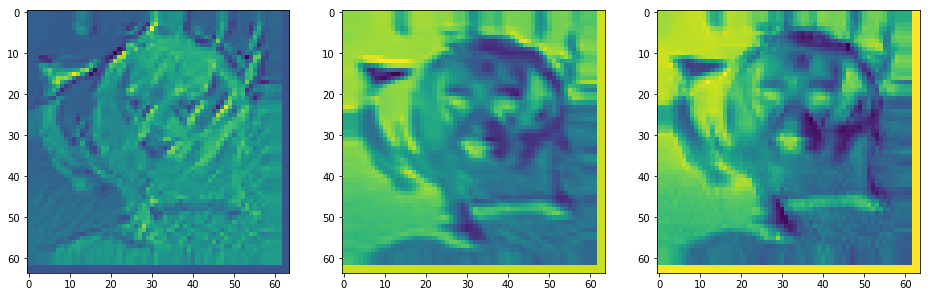

Kernel 4


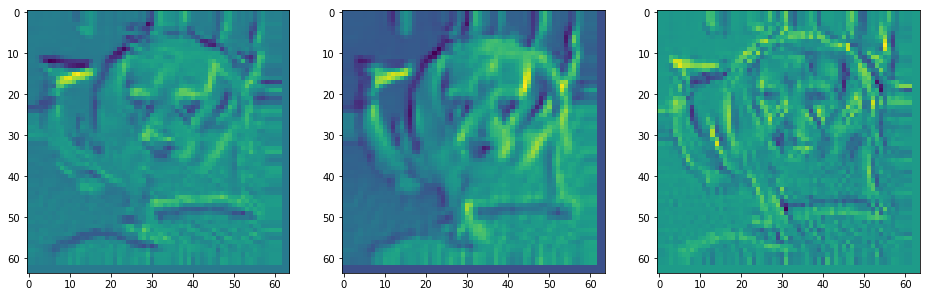

Kernel 5


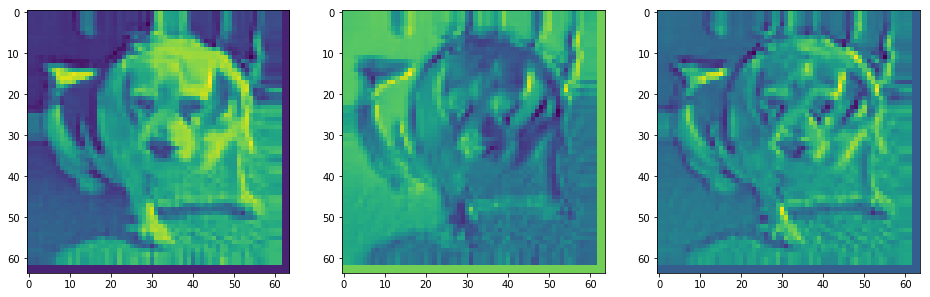

Kernel 6


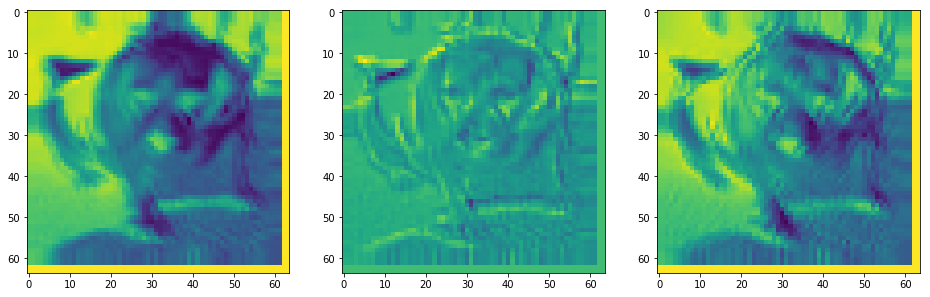

Kernel 7


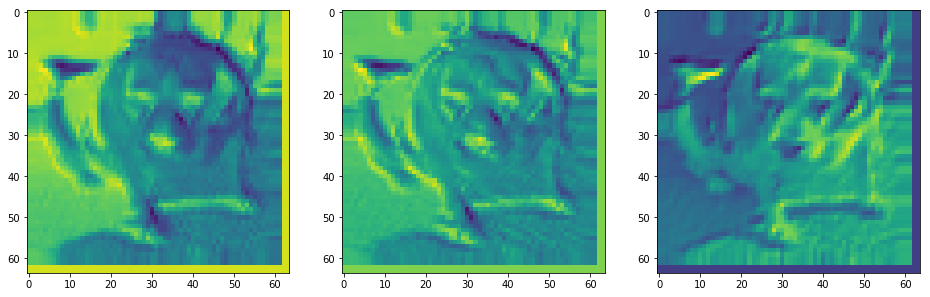

Kernel 8


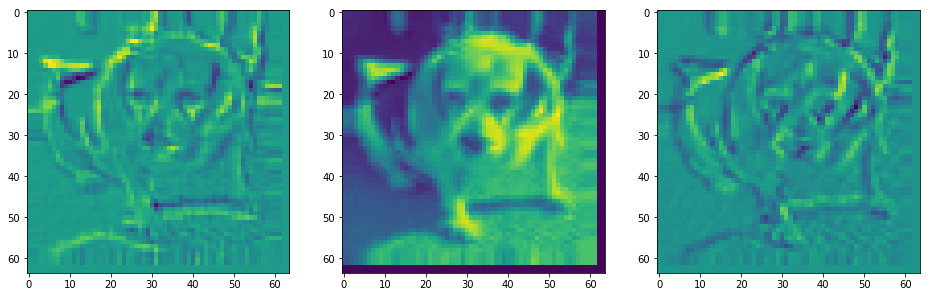

Kernel 9


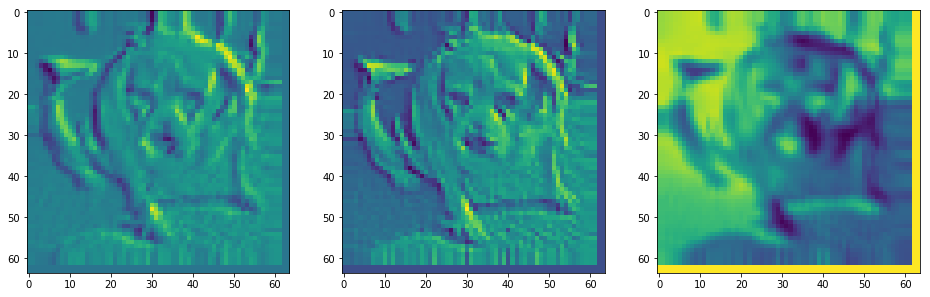

Kernel 10


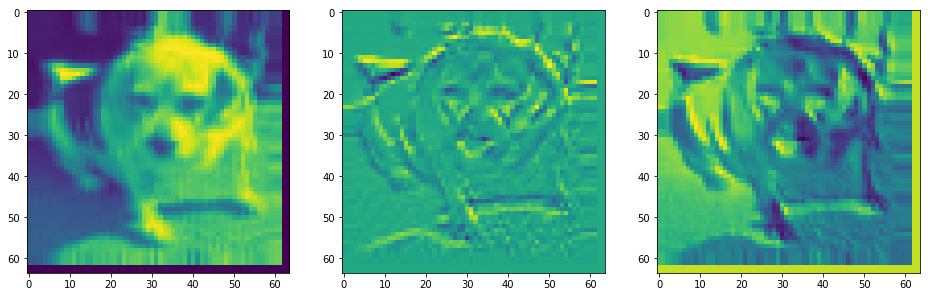

Kernel 11


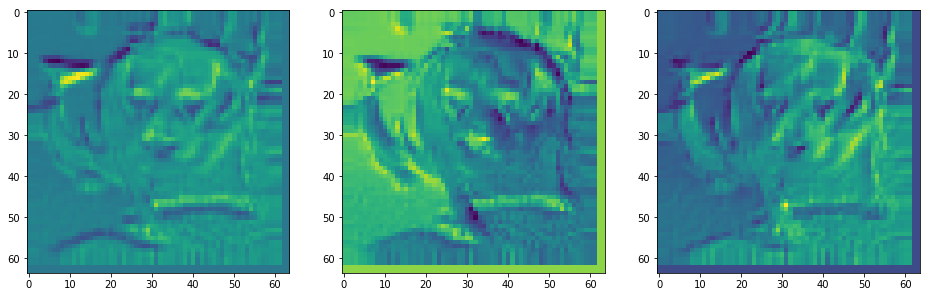

Kernel 12


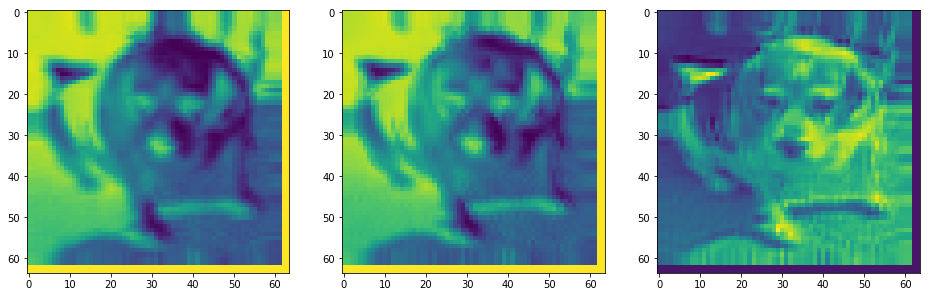

Kernel 13


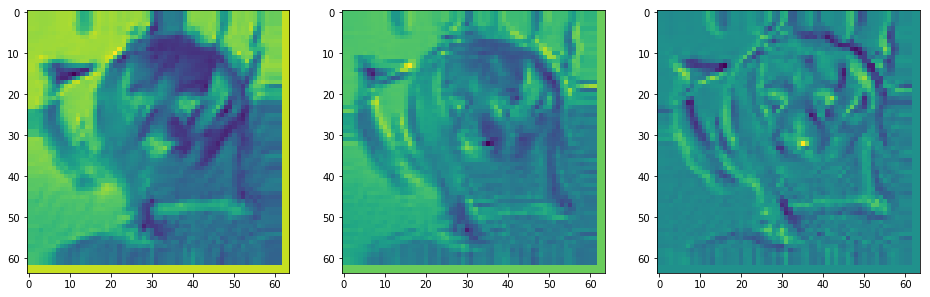

Kernel 14


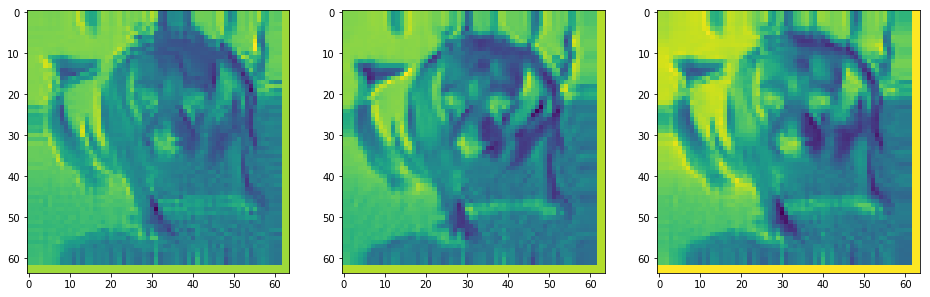

Kernel 15


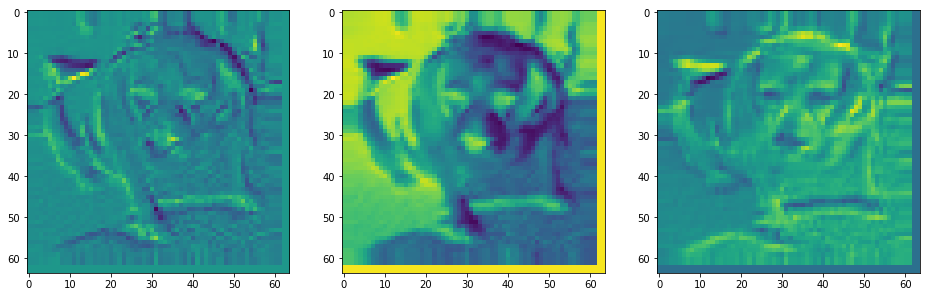

Kernel 16


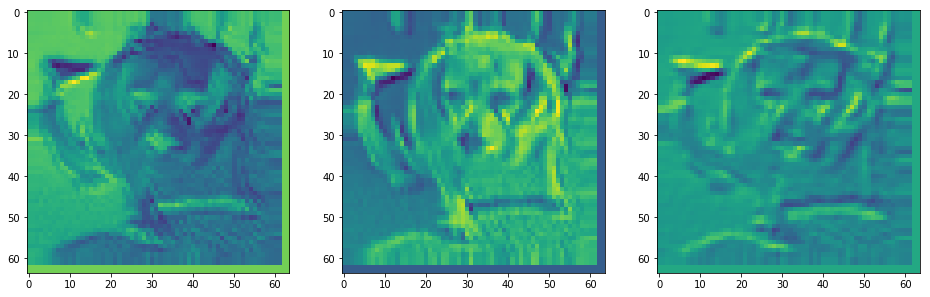

Kernel 17


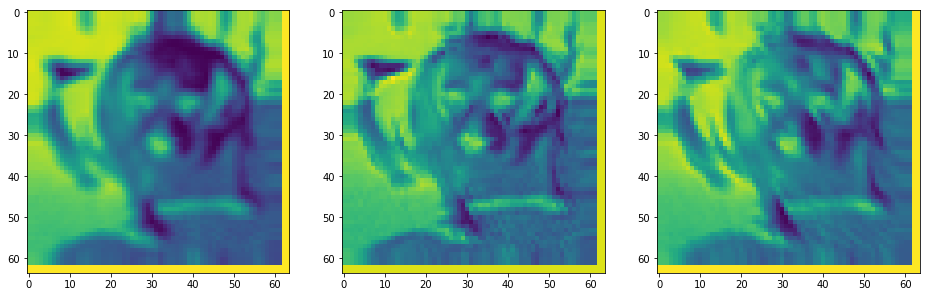

Kernel 18


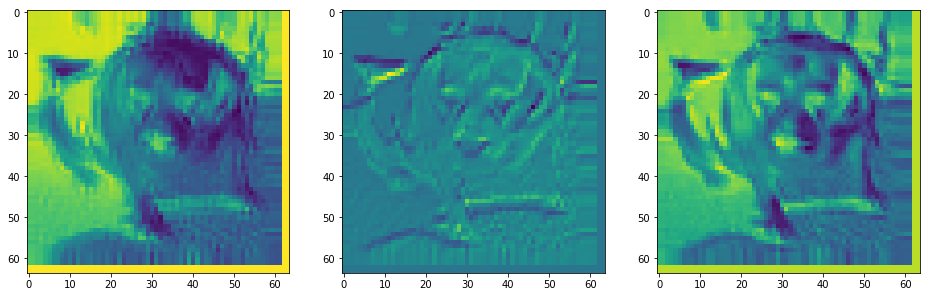

Kernel 19


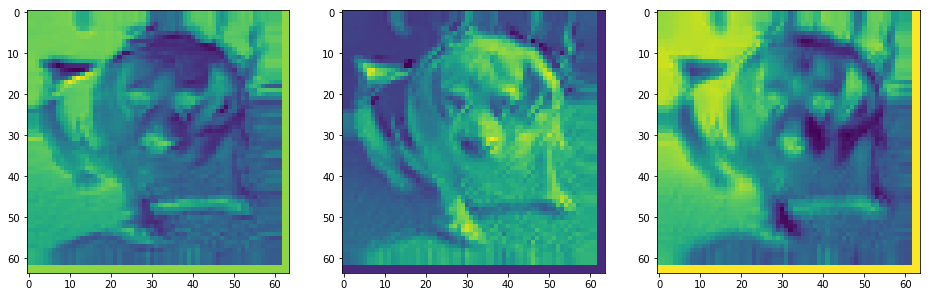

Kernel 20


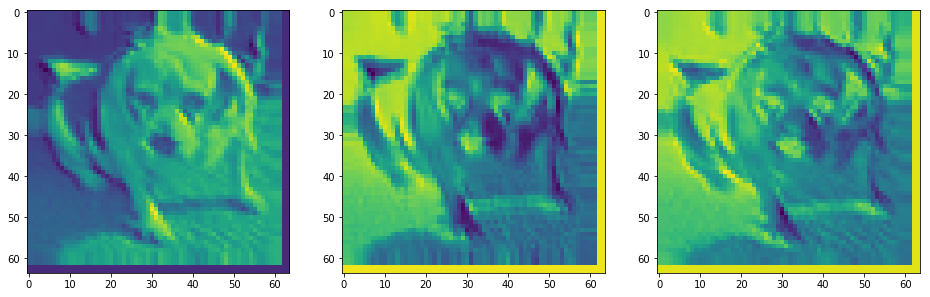

Kernel 21


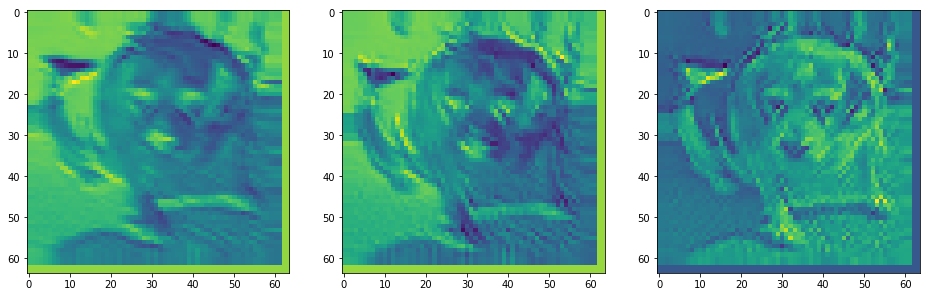

Kernel 22


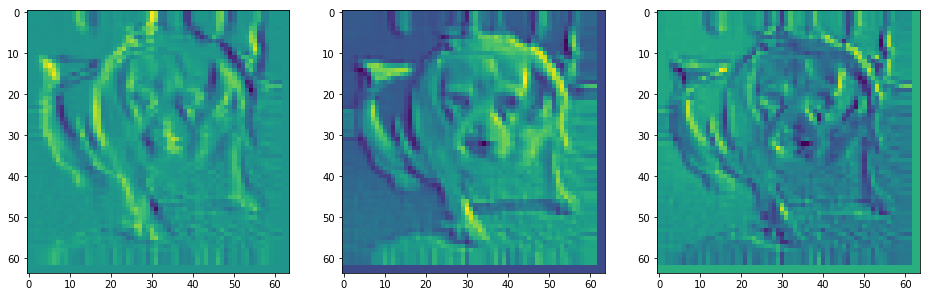

Kernel 23


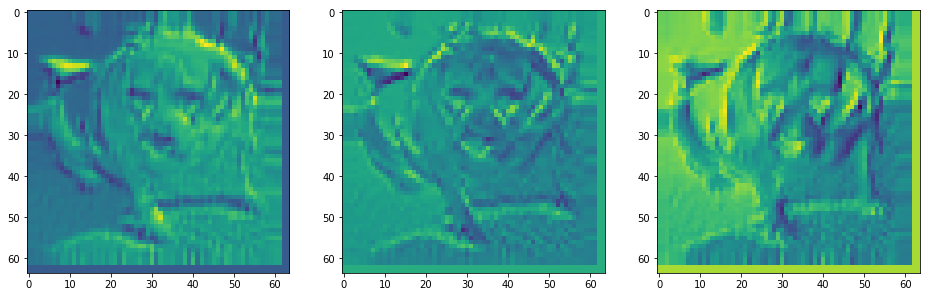

Kernel 24


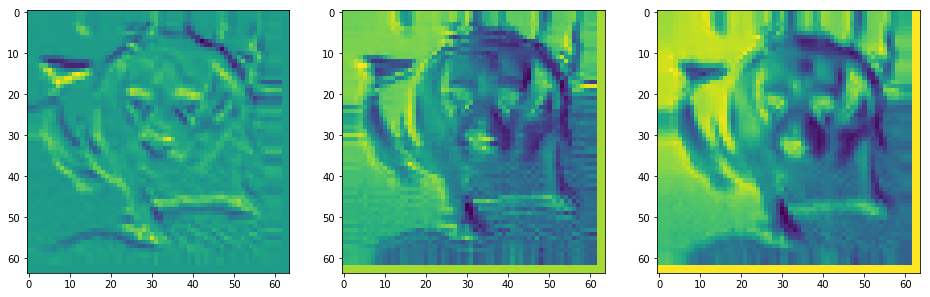

Kernel 25


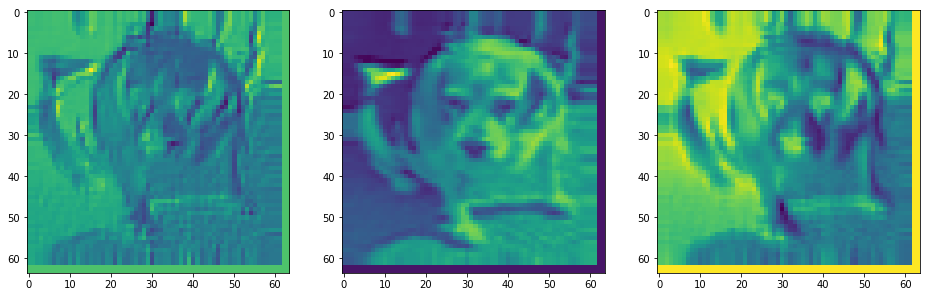

Kernel 26


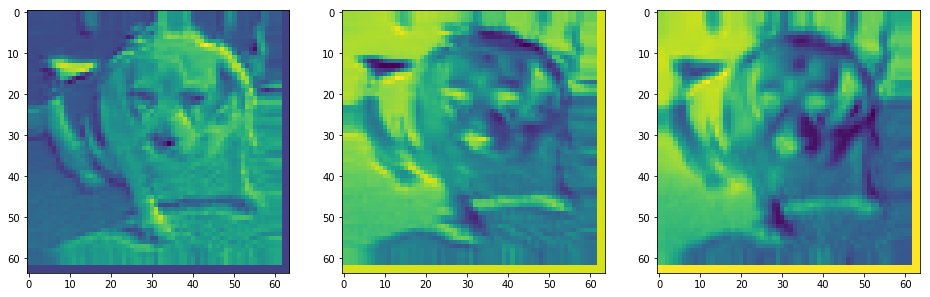

Kernel 27


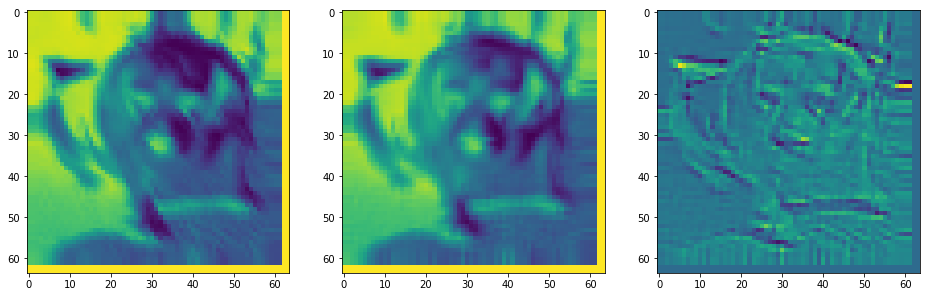

Kernel 28


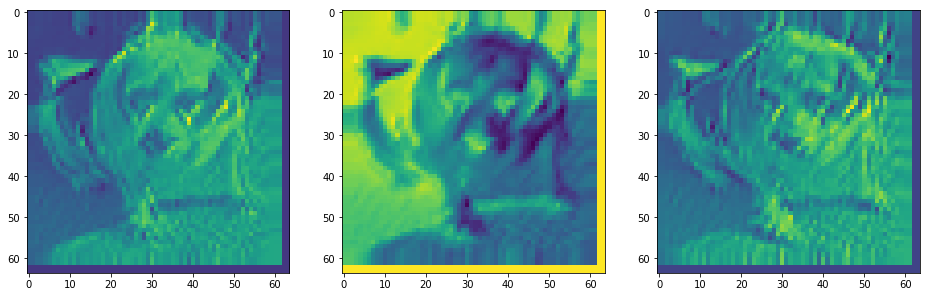

Kernel 29


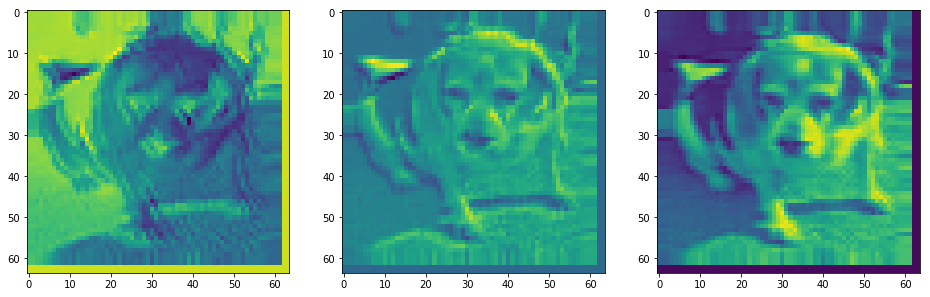

Kernel 30


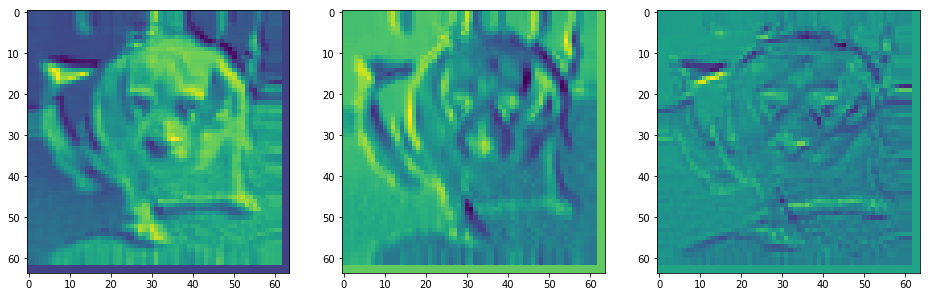

Kernel 31


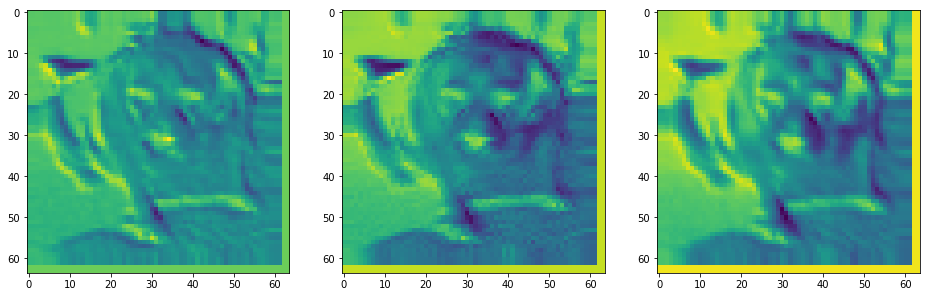

In [248]:
#########################
# VISUALIZE PARTS OF THE NET
# View convolved images with the kernel
#########################

x,y = training_set.next()

#Figure values
figure_numRows = 1
figure_numCols = 3

#Get the kernel
conv1 = model.layers[0]
weights1 = conv1.get_weights() 
kernels1 = weights1[0] 

for i in range(0,1):
    
    #Pull regular image
    image = x[i]
    
    #Create figure
    fig=plt.figure(figsize=(16, 16))
    
    #Add subplot for regular image
    fig.add_subplot(figure_numRows, figure_numCols, 1)
    plt.imshow(image)
    
    #Figure subplot counter
    subplot_counter = 4
    
    #Create filtered image (for all kernels and channels within the kernel)
    for kernel_number in range(0,32):
        
        #Debug
        print ('Kernel ' + str(kernel_number))
        
        #Create figure
        fig=plt.figure(figsize=(16, 16))
        
        for channel in range(0,3):
            
            #Debug
            #print ('Channel ' + str(channel))

            #Get the kernel for that kernel number and channel
            #Dim 1 = Rows in Kernel
            #Dim 2 = Cols in Kernel
            #Dim 3 = Number of Channel
            #Dim 4 = Number of Kernel Number within the Layer
            kernel1_instance = kernels1[:, :, channel, kernel_number] 

            #Generate filtered image
            filtered_image = convolution(image, channel, kernel1_instance)

            #Add subplot for regular image
            fig.add_subplot(figure_numRows, figure_numCols, channel+1)
            plt.imshow(filtered_image)
            
            #Index the subplot counter
            subplot_counter = subplot_counter + 1

        #Show the image
        plt.show()